# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [129]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
results=pd.merge(study_results,mouse_metadata,how="left", on="Mouse ID")

# Display the data table for preview
results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [130]:
# Checking the number of mice.
results["Mouse ID"].nunique()

249

In [131]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_id=results[results.duplicated(subset=["Mouse ID","Timepoint"])]["Mouse ID"].unique()
print(dup_id)

['g989']


In [132]:
# Optional: Get all the data for the duplicate mouse ID. 
results[results["Mouse ID"]==dup_id[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [133]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
results_clean=results[results["Mouse ID"]!=dup_id[0]]

In [134]:
# Checking the number of mice in the clean DataFrame.
results_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [135]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Sum_Stats = pd.DataFrame(["mean", "median", "variance", "standard deviation", "SEM"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Mean_tumour = results_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean().to_frame()
median_tumour = results_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median().to_frame()
TumorVolumeVariance = results_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var().to_frame()
TumorVolumeStdd = results_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std().to_frame()
TumorVolumeStde = results_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem().to_frame()

In [136]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Sum_Stats = pd.DataFrame(["mean", "median", "variance", "standard deviation", "SEM"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [137]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
results_clean.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean','median','std','std','sem']})


Tumor Volume (mm3)                                         
                           mean     median       std       std       sem
Drug Regimen                                                            
Capomulin             40.675741  41.557809  4.994774  4.994774  0.329346
Ceftamin              52.591172  51.776157  6.268188  6.268188  0.469821
Infubinol             52.884795  51.820584  6.567243  6.567243  0.492236
Ketapril              55.235638  53.698743  8.279709  8.279709  0.603860
Naftisol              54.331565  52.509285  8.134708  8.134708  0.596466
Placebo               54.033581  52.288934  7.821003  7.821003  0.581331
Propriva              52.320930  50.446266  6.622085  6.622085  0.544332
Ramicane              40.216745  40.673236  4.846308  4.846308  0.320955
Stelasyn              54.233149  52.431737  7.710419  7.710419  0.573111
Zoniferol             53.236507  51.818479  6.966589  6.966589  0.516398

## Bar and Pie Charts

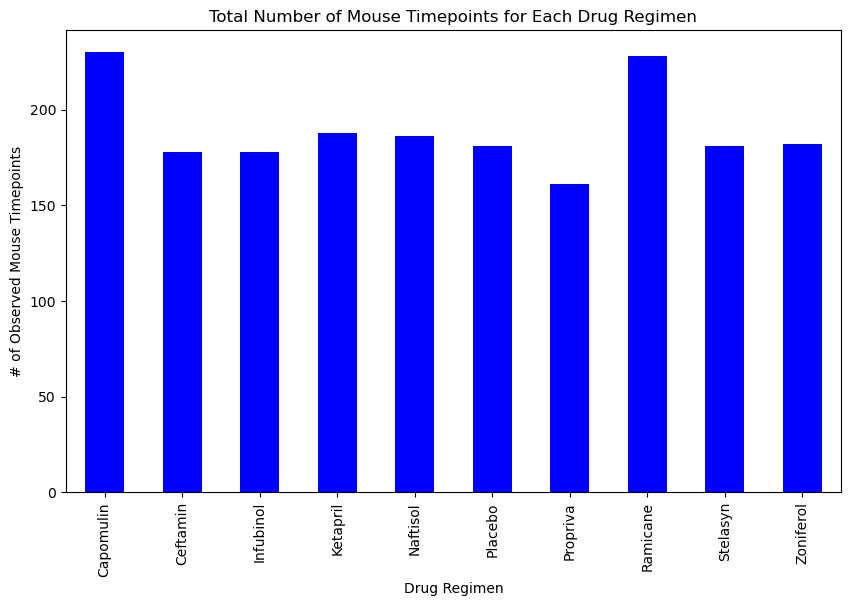

In [138]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Import library
import matplotlib.pyplot as plt

# Group the data by Drug Regimen and count the number of rows 
drug_regimen_counts = results.groupby('Drug Regimen').size()

# Create a bar plot
drug_regimen_counts.plot(kind='bar', color='blue', figsize=(10, 6))

# Set labels
plt.title('Total Number of Mouse Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Show the plot
plt.show()


In [139]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


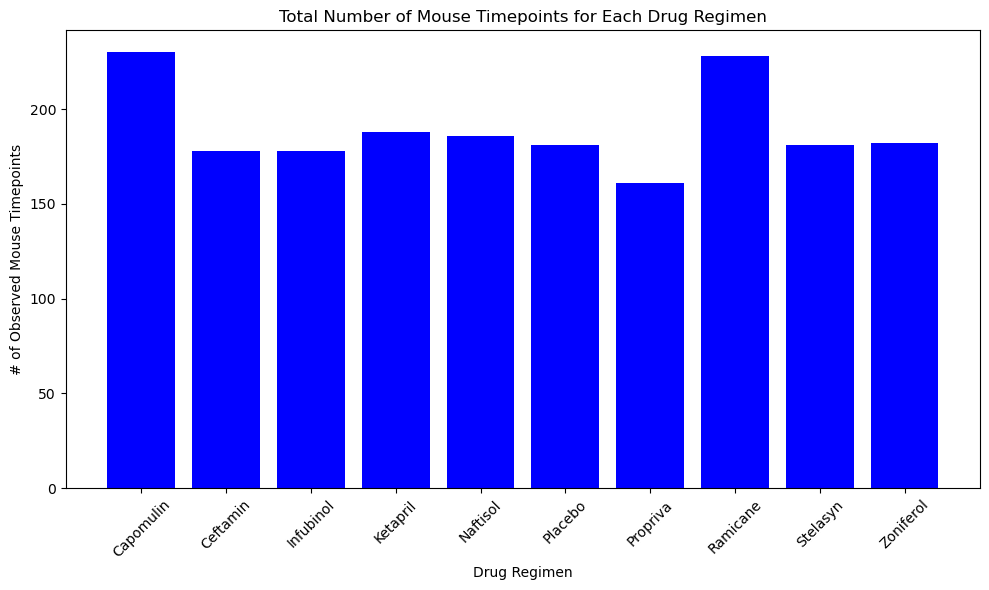

In [140]:

#import matplotlib.pyplot as plt
drug_regimen_counts = results.groupby('Drug Regimen').size()
regimens = drug_regimen_counts.index
counts = drug_regimen_counts.values

plt.figure(figsize=(10, 6))
plt.bar(regimens, counts, color='blue')

plt.title('Total Number of Mouse Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [141]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


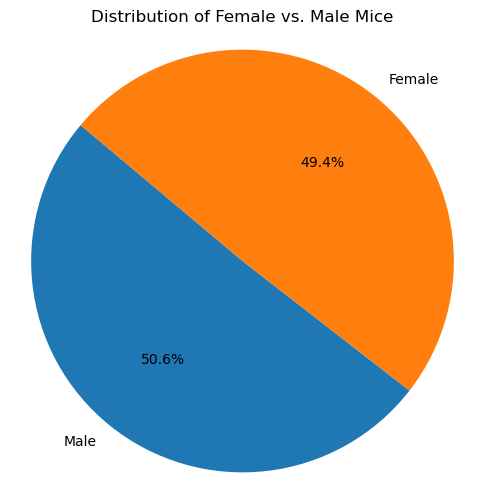

In [142]:
gender_distribution = results['Sex'].value_counts()
colors = ['#1f77b4', '#ff7f0e']

labels = ['Male', 'Female']
sizes = [gender_distribution['Male'], gender_distribution['Female']]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Female vs. Male Mice')

plt.axis('equal')  
plt.show()


In [143]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


In [144]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [145]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = results[results['Drug Regimen'].isin(selected_regimens)]


last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max()
final_tumor_volume = pd.merge(filtered_data, last_timepoints, on=['Mouse ID', 'Timepoint'])
print(final_tumor_volume[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']])



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = results[results['Drug Regimen'].isin(selected_regimens)]

last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

final_tumor_volume = pd.merge(last_timepoints, results, on=['Mouse ID', 'Timepoint'], how='inner')

print(final_tumor_volume[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']])


   Mouse ID  Timepoint  Tumor Volume (mm3) Drug Regimen
0      u153          0           45.000000     Ceftamin
1      b447          0           45.000000     Ceftamin
2      x226          0           45.000000     Ceftamin
3      t573          0           45.000000     Ceftamin
4      c326          5           36.321346    Infubinol
..      ...        ...                 ...          ...
95     a644         45           32.978522     Ramicane
96     i177         45           33.562402     Ramicane
97     r944         45           41.581521    Capomulin
98     u364         45           31.023923    Capomulin
99     p438         45           61.433892     Ceftamin

[100 rows x 4 columns]
   Mouse ID  Timepoint  Tumor Volume (mm3) Drug Regimen
0      a203         45           67.973419    Infubinol
1      a251         45           65.525743    Infubinol
2      a275         45           62.999356     Ceftamin
3      a411         45           38.407618     Ramicane
4      a444         45  

In [146]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol_data = []

for treatment in treatments:

    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]

    tumor_volumes = treatment_data['Tumor Volume (mm3)']

    tumor_vol_data.append(tumor_volumes)

    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
 
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    potential_outliers = treatment_data[(treatment_data['Tumor Volume (mm3)'] < lower_bound) | (treatment_data['Tumor Volume (mm3)'] > upper_bound)]
    print(f"{treatment}'s potential outliers: {potential_outliers['Tumor Volume (mm3)']}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


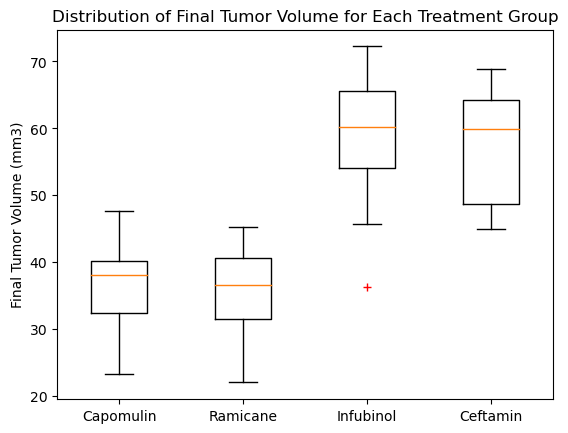

In [172]:

data_to_plot = [tumor_vol_data[0], tumor_vol_data[1], tumor_vol_data[2], tumor_vol_data[3]]

fig, ax = plt.subplots()
ax.boxplot(data_to_plot, labels=treatments, sym='r+')

ax.set_ylabel('Final Tumor Volume (mm3)')

plt.title('Distribution of Final Tumor Volume for Each Treatment Group')

plt.show()


In [148]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

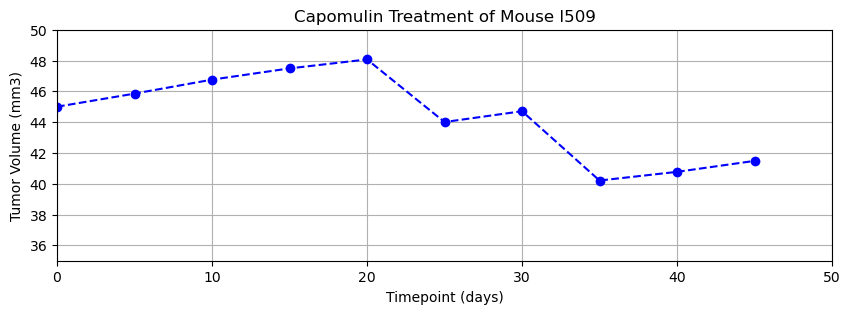

In [171]:
capomulin_i509_data = results_clean[(results_clean['Drug Regimen'] == 'Capomulin') & (results_clean['Mouse ID'] == 'l509')]

plt.figure(figsize=(10, 3))
plt.plot(capomulin_i509_data['Timepoint'], capomulin_i509_data['Tumor Volume (mm3)'], marker='o', linestyle='--', color='b')

plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.xlim(0, 50)  
plt.ylim(35, 50)  

plt.grid(True)
plt.show()





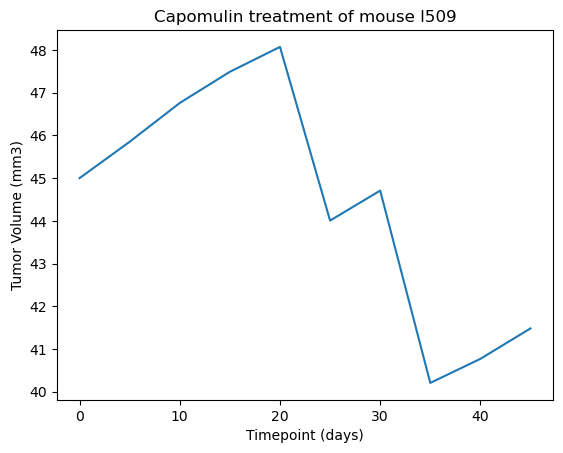

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


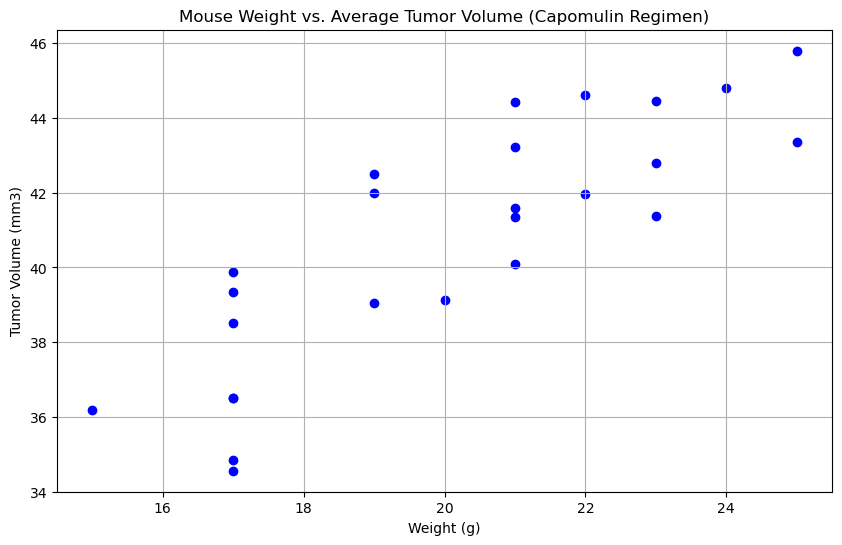

In [151]:

capomulin_data = results[results['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique().str[0]

plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='b')

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.grid(True)
plt.show()


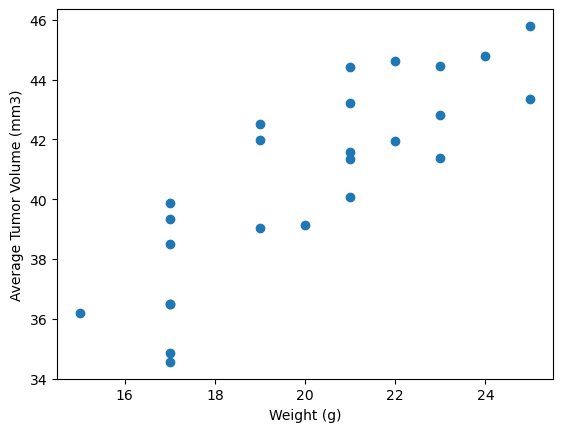

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

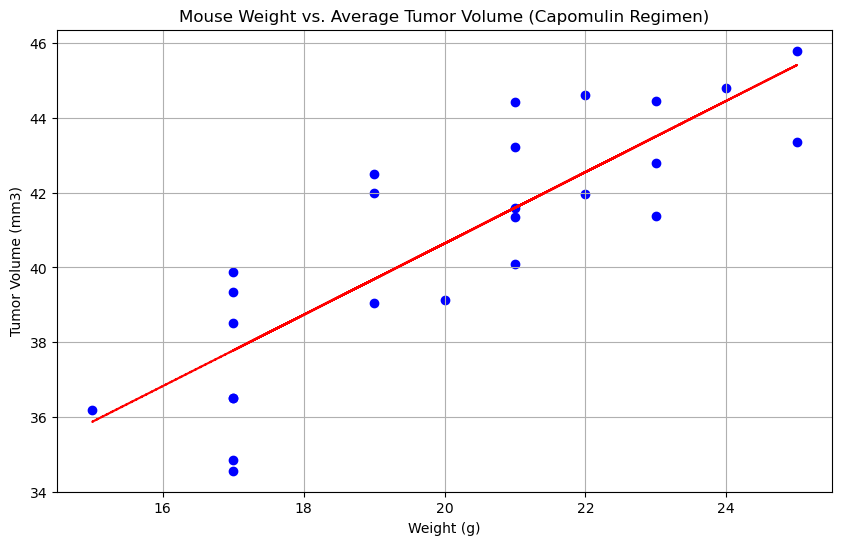

The correlation between mouse weight and average tumor volume is 0.84


In [170]:
# Filter the data
capomulin_data = results[results['Drug Regimen'] == 'Capomulin']

# Calculate the average 
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique().str[0]

# Calculate the correlation coefficient
correlation = round(average_tumor_volume.corr(mouse_weights), 2)

# linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, average_tumor_volume)

# Create a plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='b')
regression_line = slope * mouse_weights + intercept
plt.plot(mouse_weights, regression_line, color='r', linestyle='--')

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.grid(True)
plt.show()

print(f"The correlation between mouse weight and average tumor volume is {correlation}")


The correlation between mouse weight and the average tumor volume is 0.84


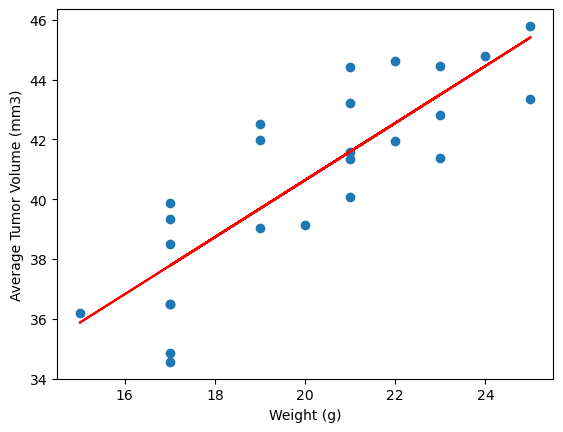

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
